In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('abalone.csv')

### Keterangan Data
Prediksi umur abalone menggunakan kondisi pengukuran fisik. Umur abalone ditentukan dengan memotong cangkangnya, menodai, dan menghitung jumlah 'ring' melalui mikroskop.<br>
Sex 			: Male, Female, and I (infant) <br>
Length 		: Panjang cangkang dalam milimeter <br>
Diameter 		: Diameter dalam milimeter <br>
Height 			: Tinggi termasuk daging dalam cangkang dalam milimeter <br>
Whole weight 	: Berat keseluruhan abalone dalam gram <br>
Shucked weight	: Berat daging abalone gram <br>
Viscera weight 	: Berat usus abalone setelah dikeringkan gram <br>
Shell weight 	: Berat cangkang setelah dikeringkan gram <br>
Rings 			: Jumlah rings yang jika ditambahkan 1.5 akan menunjukkan umur abalon

In [3]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## statistic descriptive

In [4]:
data.describe(include='all')

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


## dealing with outliers

<AxesSubplot:xlabel='Rings'>

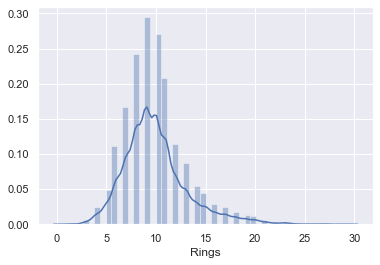

In [6]:
sns.distplot(data['Rings'])

In [7]:
q = data['Rings'].quantile(0.99)
data_1 = data[data['Rings']<q]
data_1.describe(include='all')

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4115,4115.000000,4115.000000,4115.000000,4115.000000,4115.000000,4115.000000,4115.000000,4115.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.522712,0.406738,0.138944,0.821987,0.357979,0.179528,0.235866,9.758931
std,NaN,0.120241,0.099266,0.041767,0.488183,0.222440,0.109454,0.136871,2.904193
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.345000,0.115000,0.438500,0.183250,0.092000,0.129000,8.000000
50%,NaN,0.540000,0.425000,0.140000,0.793000,0.334000,0.169000,0.230000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.145000,0.500750,0.251500,0.324500,11.000000


<AxesSubplot:xlabel='Rings'>

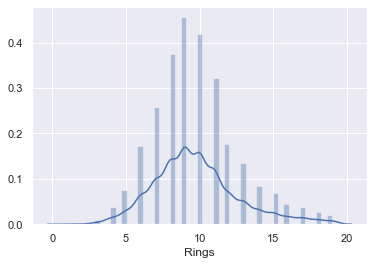

In [8]:
sns.distplot(data_1['Rings'])

<AxesSubplot:xlabel='Length'>

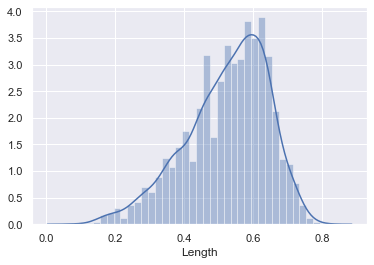

In [9]:
sns.distplot(data['Length'])

<AxesSubplot:xlabel='Length'>

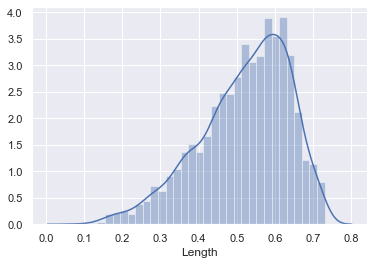

In [10]:
q = data_1['Length'].quantile(0.99)
data_2 = data_1[data_1['Length']<q]
sns.distplot(data_2['Length'])

<AxesSubplot:xlabel='Diameter'>

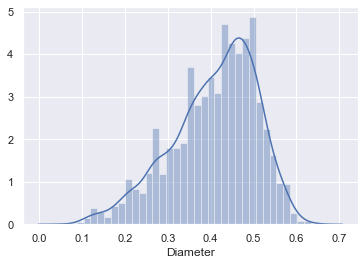

In [11]:
sns.distplot(data['Diameter'])

<AxesSubplot:xlabel='Diameter'>

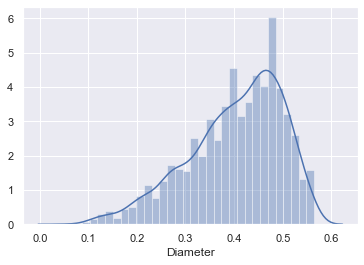

In [12]:
q = data_2['Diameter'].quantile(0.99)
data_3 = data_2[data_2['Diameter']<q]
sns.distplot(data_3['Diameter'])

<AxesSubplot:xlabel='Height'>

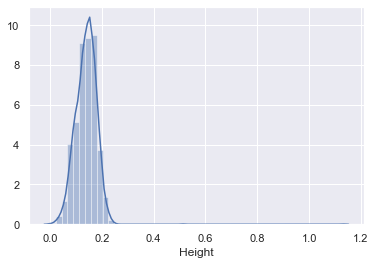

In [13]:
sns.distplot(data['Height'])

<AxesSubplot:xlabel='Height'>

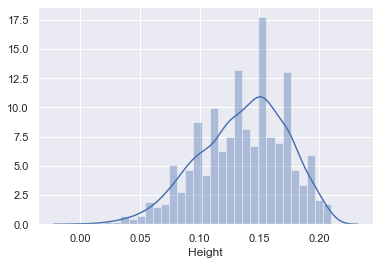

In [14]:
q = data_3['Height'].quantile(0.99)
data_4 = data_3[data_3['Height']<q]
sns.distplot(data_4['Height'])

<AxesSubplot:xlabel='Whole weight'>

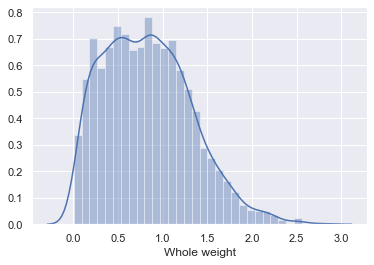

In [15]:
sns.distplot(data['Whole weight'])

C:\WPy-3670\python-3.6.7.amd64\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<AxesSubplot:xlabel='Whole weight'>

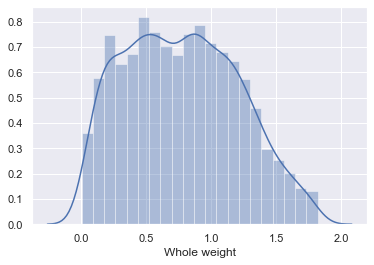

In [16]:
q = data_4['Whole weight'].quantile(0.99)
data_5 = data_4[data_3['Whole weight']<q]
sns.distplot(data_5['Whole weight'])

<AxesSubplot:xlabel='Shucked weight'>

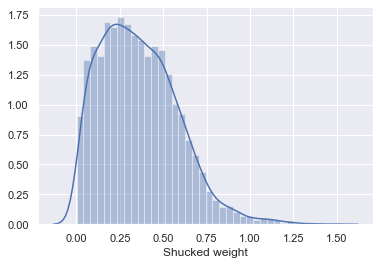

In [17]:
sns.distplot(data['Shucked weight'])

<AxesSubplot:xlabel='Whole weight'>

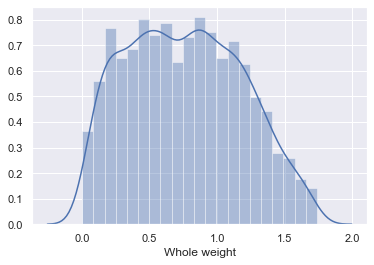

In [18]:
q = data_5['Whole weight'].quantile(0.99)
data_6 = data_5[data_5['Whole weight']<q]
sns.distplot(data_6['Whole weight'])

<AxesSubplot:xlabel='Viscera weight'>

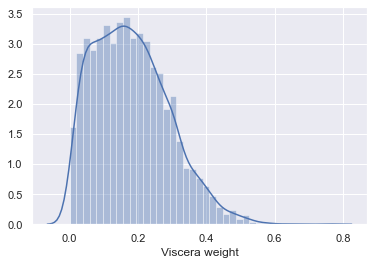

In [19]:
sns.distplot(data['Viscera weight'])

<AxesSubplot:xlabel='Viscera weight'>

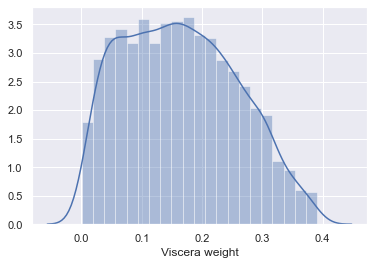

In [20]:
q = data_6['Viscera weight'].quantile(0.99)
data_7 = data_6[data_6['Viscera weight']<q]
sns.distplot(data_7['Viscera weight'])

<AxesSubplot:xlabel='Shell weight'>

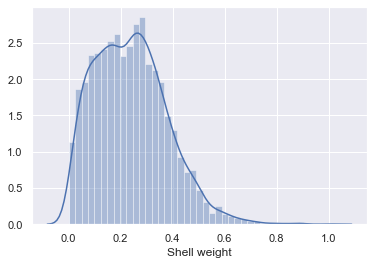

In [21]:
sns.distplot(data['Shell weight'])

<AxesSubplot:xlabel='Shell weight'>

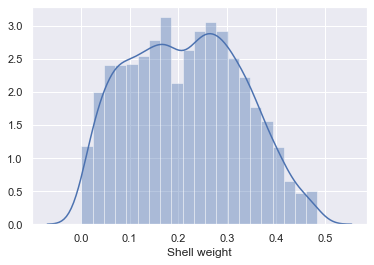

In [22]:
q = data_7['Shell weight'].quantile(0.99)
data_8 = data_7[data_7['Shell weight']<q]
sns.distplot(data_8['Shell weight'])

In [23]:
data_cleaned = data_8.reset_index(drop=True)

In [24]:
df = data_cleaned.copy()
df['Sex'] = df['Sex'].map({'M': 2, 'F': 1, 'I': 0})

In [25]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## checking multicolinearity

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[['Length', 'Diameter', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range (variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,694.81,Length
1,754.32,Diameter
2,513.85,Whole weight
3,120.56,Shucked weight
4,72.91,Viscera weight
5,97.99,Shell weight


In [97]:
data_no_multicollinearity = df.drop(['Diameter'], axis=1)

In [98]:
log_rings = np.log(data_no_multicollinearity['Rings'])
data_no_multicollinearity['log_rings']=log_rings
data_no_multicollinearity.head()

,Sex,Length,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,log_rings
0,2,0.46,0.10,0.51,0.22,0.10,0.15,15,2.71
1,2,0.35,0.09,0.23,0.10,0.05,0.07,7,1.95
2,1,0.53,0.14,0.68,0.26,0.14,0.21,9,2.20
3,2,0.44,0.12,0.52,0.22,0.11,0.15,10,2.30
4,0,0.33,0.08,0.20,0.09,0.04,0.06,7,1.95


In [99]:
cleaned_data = data_no_multicollinearity.drop(['Rings'], axis=1)

In [100]:
cleaned_data

,Sex,Length,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,log_rings
0,2,0.46,0.10,0.51,0.22,0.10,0.15,2.71
1,2,0.35,0.09,0.23,0.10,0.05,0.07,1.95
2,1,0.53,0.14,0.68,0.26,0.14,0.21,2.20
3,2,0.44,0.12,0.52,0.22,0.11,0.15,2.30
4,0,0.33,0.08,0.20,0.09,0.04,0.06,1.95
...,...,...,...,...,...,...,...,...
3808,2,0.56,0.15,0.87,0.40,0.17,0.23,2.08
3809,1,0.56,0.17,0.89,0.37,0.24,0.25,2.40
3810,2,0.59,0.14,0.97,0.44,0.21,0.26,2.30
3811,2,0.60,0.20,1.18,0.53,0.29,0.31,2.20


## creating regression

In [101]:
targets = cleaned_data['log_rings']
inputs = cleaned_data.drop(['log_rings'],axis=1)

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [103]:
input_scaled = scaler.transform(inputs)

In [104]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_scaled, targets, test_size=0.2, random_state=42)

In [105]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [106]:
y_hat = reg.predict(x_train)

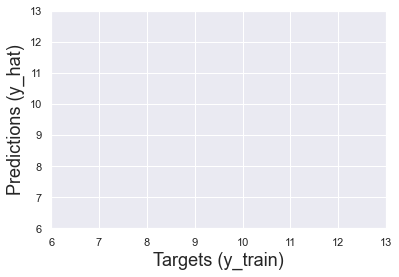

In [107]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size = 18)
plt.ylabel('Predictions (y_hat)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residual_PDF')

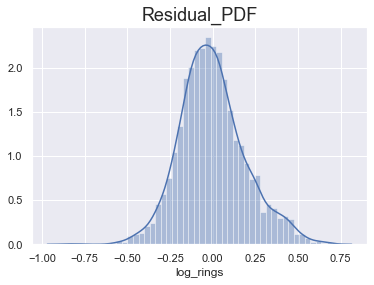

In [108]:
sns.distplot(y_train-y_hat)
plt.title('Residual_PDF', size=18)

In [109]:
reg.score(x_train, y_train)

0.5800170582571069

In [110]:
reg.intercept_

2.21326892748083

In [111]:
reg.coef_

array([ 0.03827183,  0.15751769,  0.10381652,  0.29227943, -0.34983059,
       -0.1023086 ,  0.06826573])

In [112]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights']=reg.coef_
reg_summary

,Features,Weights
0,Sex,0.04
1,Length,0.16
2,Height,0.10
3,Whole weight,0.29
4,Shucked weight,-0.35
5,Viscera weight,-0.10
6,Shell weight,0.07


In [113]:
y_hat_test = reg.predict(x_test)

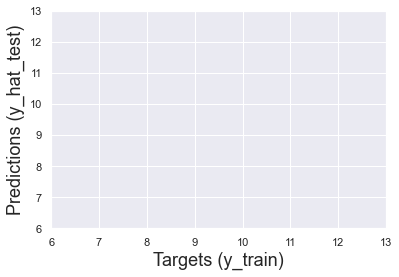

In [114]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_train)', size = 18)
plt.ylabel('Predictions (y_hat_test)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [115]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'] )
df_pf.head()

,Prediction
0,6.82
1,7.47
2,11.32
3,9.32
4,8.77


In [116]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,6.82,15.00
1,7.47,nan
2,11.32,nan
3,9.32,nan
4,8.77,nan
5,6.76,nan
6,7.16,nan
7,11.65,nan
8,12.14,nan
9,10.58,nan


In [ ]:
y_test = y_test.reset_index(drop=True)
y_test.head()

In [91]:
df_pf['Target']=np.exp(y_test)
df_pf

,Prediction,Target
0,6.82,8.00
1,7.47,13.00
2,11.32,11.00
3,9.32,13.00
4,8.77,8.00
5,6.76,6.00
6,7.16,7.00
7,11.65,12.00
8,12.14,12.00
9,10.58,11.00


In [92]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [93]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,6.82,8.00,1.18,14.69
1,7.47,13.00,5.53,42.57
2,11.32,11.00,-0.32,2.87
3,9.32,13.00,3.68,28.30
4,8.77,8.00,-0.77,9.59
5,6.76,6.00,-0.76,12.67
6,7.16,7.00,-0.16,2.29
7,11.65,12.00,0.35,2.88
8,12.14,12.00,-0.14,1.19
9,10.58,11.00,0.42,3.83


In [94]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,763.00,763.00,763.00,763.00
mean,9.32,9.46,0.14,15.45
std,2.06,2.84,1.97,15.64
min,3.79,1.00,-5.47,0.03
25%,7.92,8.00,-1.05,5.95
50%,9.33,9.00,-0.12,12.20
75%,10.57,11.00,1.03,22.06
max,16.47,19.00,9.29,278.73


In [95]:
pd.options.display.max_rows=999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
597,11.00,11.00,0.00,0.03
404,8.00,8.00,-0.00,0.03
581,7.00,7.00,-0.00,0.04
193,9.99,10.00,0.01,0.09
195,7.99,8.00,0.01,0.14
192,9.02,9.00,-0.02,0.23
492,12.03,12.00,-0.03,0.24
537,13.03,13.00,-0.03,0.25
623,8.98,9.00,0.02,0.27
355,8.02,8.00,-0.02,0.29
